This example shows some data exploration methods to get a better understanding of the data.

Requirements for usage:
- create a Workspace using the *Data Manager*
- create a Data Collection inside the workspace
- adjust the names in the code below if you use other names than this notebook

### load the required libraries and the data

In [1]:
import pandas as pd
import sapdi
ws = sapdi.get_workspace(name='Demo-WS')
dc = ws.get_datacollection(name='Titanic')
with dc.open('train.csv').get_reader() as reader:
    train = pd.read_csv(reader)
with dc.open('test.csv').get_reader() as reader:
    test = pd.read_csv(reader)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecatedWarning: get_workspace is deprecated as of 0.3.30.
  This is separate from the ipykernel package so we can avoid doing imports until


### Optional: load additional libraries
additional requirements or libraries can be installed directly using the Juypter notebook

In [18]:
#!pip install seaborn

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### First impression
to take a first look at the data it is sufficient to just use the name of the dataframe

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Calculate statistics for the data
To get more information about the dataset it´s useful to calculate some basic statistics for every column (=features). 
In Python this can be done using the *describe* method.

In [11]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,6
top,NaN,NaN,NaN,"Waelens, Mr. Achille",male,NaN,NaN,NaN,1601,NaN,G6,S,Mr
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,517
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN


### Check for null or missing values
A very important step is to check for missing values and to implement methods to handle those. This can be done by imputing replacement values or by removing those entries entirely.

In [12]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64


### Add visualizations
Another great method to gain more insights about our data is to visualize part of it. There are several nice visualization libraries available, in this case we use the seaborn library to plot information related to the age column und the passenger class of the person.

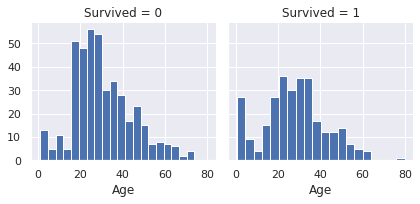

In [14]:
sns.set(style="ticks", context="talk")
sns.set(font_scale = 1)

g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

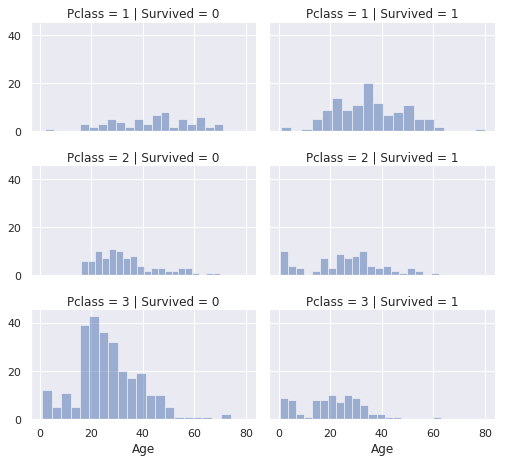

In [15]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


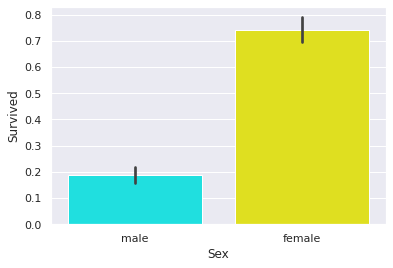

In [16]:
sns.barplot(x="Sex", y="Survived", data=train,palette=['cyan','yellow'],)
#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

### Create new Features
The next example shows how to create new features. First we extract all passenger titles. Then we group them according to their occurences including a separate categorie for rare name titles like Captain or Lady. After that we compare the chances of survival based on those titles.

In [18]:
combine = [train, test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000
